# Train-test dataset splitting

In [0]:
%tensorflow_version 2.x

import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

TensorFlow 2.x selected.


In [0]:
!git clone https://github.com/EmptyJackson/datasci-practical-b
%cd datasci-practical-b/

Cloning into 'datasci-practical-b'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 35 (delta 10), reused 26 (delta 7), pack-reused 0
Unpacking objects: 100% (35/35), done.
/content/datasci-practical-b


In [0]:
!git pull

Already up to date.


In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/ekochmar/cl-datasci-pnp/master/Final_assignment/diabetes/diabetic_data_original.csv")
#data = pd.read_csv("https://raw.githubusercontent.com/ekochmar/cl-datasci-pnp/master/Final_assignment/diabetes/diabetic_data_balanced.csv")
ids = pd.read_csv("https://raw.githubusercontent.com/ekochmar/cl-datasci-pnp/master/Final_assignment/diabetes/IDs_mapping.csv")

In [0]:
from transformers import pipeline
df = pipeline.fit_transform(data)

In [0]:
useful_df = df.drop(['encounter_id', 'patient_nbr'], axis=1)
useful_df

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmit_bin,gender_bin,age_mid,number_emergency_lg,number_inpatient_lg,number_outpatient_lg,admission_type_id_1,admission_type_id_2,admission_type_id_3,admission_source_id_1,admission_source_id_2,admission_source_id_3,admission_source_id_4,admission_source_id_5,admission_source_id_6,admission_source_id_7,discharge_disposition_id_1,discharge_disposition_id_2,discharge_disposition_id_3,discharge_disposition_id_4,discharge_disposition_id_5,...,AfricanAmerican,Hispanic,InternalMedicine,Emergency/Trauma,Family/GeneralPractice,Cardiology,Surgery-General,Nephrology,Orthopedics,Orthopedics-Reconstructive,Radiologist,Pulmonology,Psychiatry,Urology,ObstetricsandGynecology,Surgery-Cardiovascular/Thoracic,Gastroenterology,Surgery-Vascular,Surgery-Neuro,PhysicalMedicineandRehabilitation,Oncology,Pediatrics,Hematology/Oncology,Neurology,Pediatrics-Endocrinology,Otolaryngology,Endocrinology,Surgery-Thoracic,Psychology,Podiatry,Surgery-Cardiovascular,Pediatrics-CriticalCare,Hematology,Gynecology,Hospitalist,Radiology,max_glu_serum_>300,max_glu_serum_>200,A1Cresult_>7,A1Cresult_>8
12,7,60,0,15,8,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,45,0.693147,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
27,2,25,2,11,3,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,55,0.000000,0.000000,0.000000,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
28,10,53,0,20,6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,25,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
32,6,27,0,16,8,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,75,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
33,5,37,0,18,8,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,65,0.000000,0.000000,0.000000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101757,6,45,1,25,9,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,65,0.693147,1.098612,1.386294,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
101758,3,51,0,16,9,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,75,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,...,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
101759,5,33,3,18,9,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,85,0.000000,0.693147,0.000000,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0
101760,1,53,0,9,13,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,1,75,0.000000,0.000000,0.693147,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0


In [0]:
x = useful_df.to_numpy()

perps = [5, 10, 25, 50, 100, 200]
best_perp = [200]
x_tsnes = []
for p in best_perp:
    tsne = TSNE(n_components=2, perplexity=p, verbose=1, random_state=37)
    x_tsnes.append(tsne.fit_transform(x))

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 47021 samples in 0.708s...
[t-SNE] Computed neighbors for 47021 samples in 53.712s...
[t-SNE] Computed conditional probabilities for sample 1000 / 47021
[t-SNE] Computed conditional probabilities for sample 2000 / 47021
[t-SNE] Computed conditional probabilities for sample 3000 / 47021
[t-SNE] Computed conditional probabilities for sample 4000 / 47021
[t-SNE] Computed conditional probabilities for sample 5000 / 47021
[t-SNE] Computed conditional probabilities for sample 6000 / 47021
[t-SNE] Computed conditional probabilities for sample 7000 / 47021
[t-SNE] Computed conditional probabilities for sample 8000 / 47021
[t-SNE] Computed conditional probabilities for sample 9000 / 47021
[t-SNE] Computed conditional probabilities for sample 10000 / 47021
[t-SNE] Computed conditional probabilities for sample 11000 / 47021
[t-SNE] Computed conditional probabilities for sample 12000 / 47021
[t-SNE] Computed conditional probabilities for s

In [0]:
"""
perps = [5, 10, 25, 50, 100, 200]
fig = plt.figure(figsize=(20,15))
for i, x_tsne in enumerate(x_tsnes):
    ax = plt.subplot(2, len(x_tsnes)/2, i+1)
    ax.scatter(x_tsne[:,0], x_tsne[:,1], s=0.05)
    ax.set_title('Perplexity = %d' % perps[i], fontsize=15)

plt.subplots_adjust(hspace=0.1, wspace=0.2)
plt.show()
#plt.savefig('tsne.png', dpi=300) 
"""

"\nperps = [5, 10, 25, 50, 100, 200]\nfig = plt.figure(figsize=(20,15))\nfor i, x_tsne in enumerate(x_tsnes):\n    ax = plt.subplot(2, len(x_tsnes)/2, i+1)\n    ax.scatter(x_tsne[:,0], x_tsne[:,1], s=0.05)\n    ax.set_title('Perplexity = %d' % perps[i], fontsize=15)\n\nplt.subplots_adjust(hspace=0.1, wspace=0.2)\nplt.show()\n#plt.savefig('tsne.png', dpi=300) \n"

In [0]:
from sklearn.cluster import DBSCAN, KMeans

cluster = DBSCAN(min_samples=5, eps=1.)
best_tsne = x_tsnes[-1]
labels = cluster.fit_predict(best_tsne)
print(max(labels))
labels

10


array([0, 1, 2, ..., 6, 3, 6])

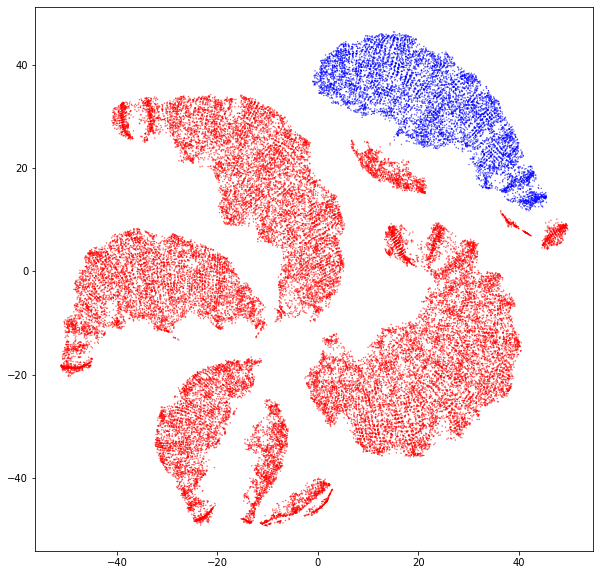

In [0]:
#new_labs = labels
new_labs = ['b' if lab == 6 else 'r' for lab in labels]

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
ax.scatter(best_tsne[:,0], best_tsne[:,1], s=0.1, c=new_labs, cmap='hsv')
#plt.show()
plt.savefig('tsne_single.png', dpi=300) 

In [0]:
len(labels) * .2

9404.2

In [0]:
for label in set(labels):
    print(str(label) +':'+ str(sum([i==label for i in labels])))

0:4288
1:7499
2:981
3:12457
4:10225
5:1657
6:8107
7:1080
8:7
9:202
10:507
-1:11


In [0]:
8107 / len(labels)

0.1724123264073499

In [0]:
is_test = [i==6 for i in labels]
is_test

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 F

## Serializing t-SNE output

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
b = np.array(x_tsnes)

with open('content/gdrive/tsne_save.txt', 'w') as f:
    sh = b.shape
    for dim in len(sh):
        f.write('%d\n' % sh[dim])
    f.write('shape done\n')
    for x_tsne in x_tsnes:
        for coord in x_tsne:
            for val in coord:
                f.write('%f\n' % val)